# Introduction to Data Visualisation with Seaborn

### Prerequisites

##### This notebook uses seaborn version 0.11.0 which can be installed by running the below

In [1]:
#pip install seaborn==0.11.0

## __1. Load in the Tips Dataset__

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('tips')
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

## __2. Scatterplot__

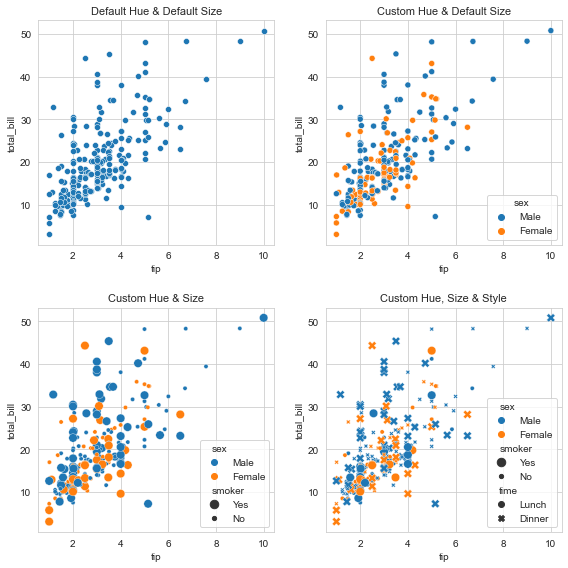

In [4]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(2,2, figsize = (8,8))
ax=ax.flatten()
sns.scatterplot(x = 'tip', y = 'total_bill', data = data, ax = ax[0])
ax[0].set_title('Default Hue & Default Size',  fontsize = 11)
sns.scatterplot(x = 'tip', y = 'total_bill', hue = 'sex', data = data, ax = ax[1])
ax[1].set_title('Custom Hue & Default Size',  fontsize = 11)
sns.scatterplot(x = 'tip', y = 'total_bill', hue = 'sex', size = 'smoker', data = data, ax = ax[2])
ax[2].set_title('Custom Hue & Size', fontsize = 11)
sns.scatterplot(x = 'tip', y = 'total_bill', hue = 'sex', size = 'smoker', style = 'time', data = data, ax = ax[3])
ax[3].set_title('Custom Hue, Size & Style', fontsize = 11)
plt.tight_layout(w_pad= 2, h_pad=2)

## __3. Barplot__

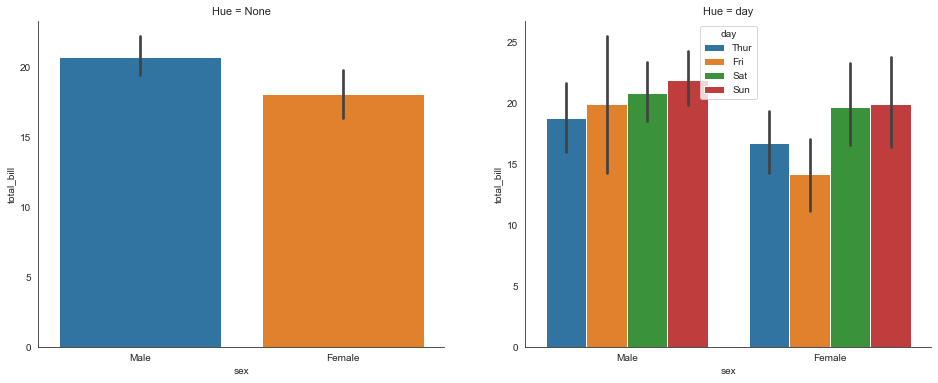

In [5]:
sns.set_style(style='white')
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.barplot(x = 'sex', y = 'total_bill', data=data, ax=ax[0])
ax[0].set_title('Hue = None', fontsize = 11)
sns.barplot(x = 'sex', y = 'total_bill', hue='day', data=data, ax=ax[1])
ax[1].set_title('Hue = day', fontsize = 11)
sns.despine()

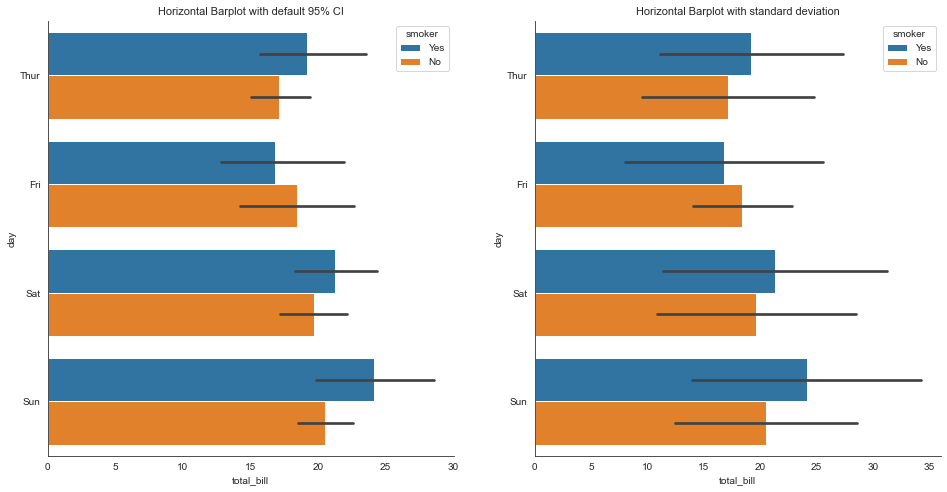

In [6]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.barplot(x = 'total_bill', y = 'day', hue='smoker', data=data, ax=ax[0])
ax[0].set_title('Horizontal Barplot with default 95% CI', fontsize = 11)
sns.barplot(x = 'total_bill', y = 'day', hue='smoker', ci = 'sd', data=data, ax=ax[1])
ax[1].set_title('Horizontal Barplot with standard deviation', fontsize = 11)
sns.despine()

## __4. Box & Violin Plot__

### Boxplot

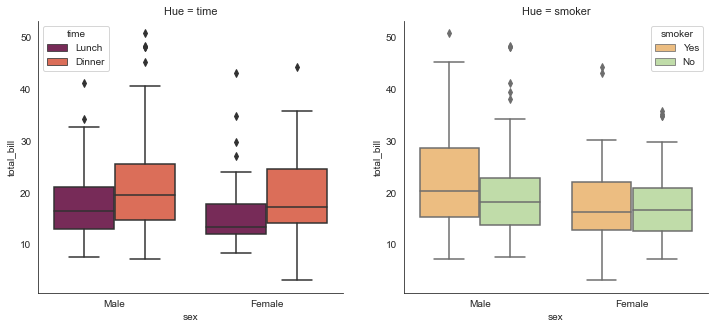

In [7]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.boxplot(x = 'sex', y = 'total_bill', hue = 'time', data = data, palette='rocket', ax = ax[0])
ax[0].set_title('Hue = time', fontsize = 11)
sns.boxplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = data, palette='Spectral', ax = ax[1])
ax[1].set_title('Hue = smoker', fontsize = 11)
sns.despine()

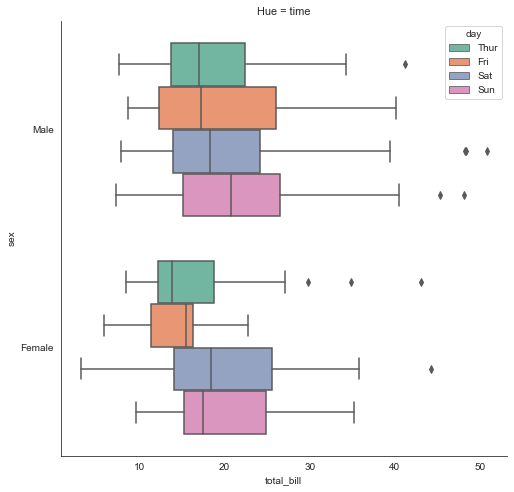

In [8]:
fig, ax = plt.subplots(figsize = (8,8))
sns.boxplot(x = 'total_bill', y = 'sex', hue = 'day', data = data, palette='Set2', ax = ax)
ax.set_title('Hue = time', fontsize = 11)
sns.despine()

### Violin Plot

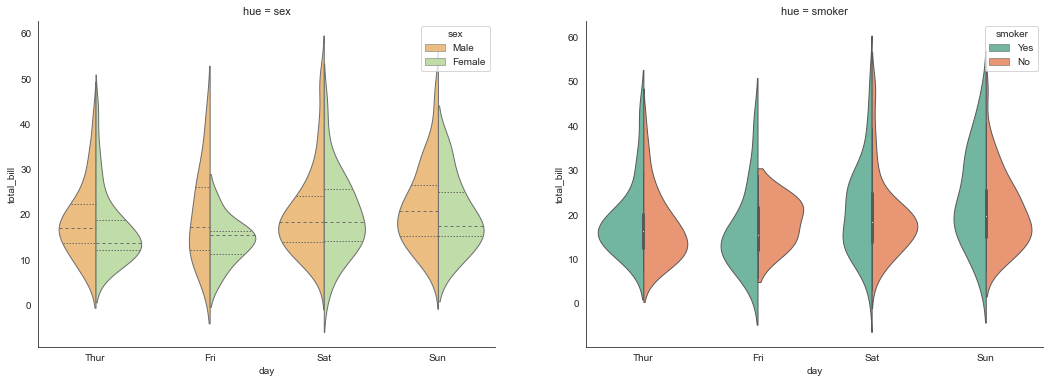

In [9]:
fig, ax = plt.subplots(1,2, figsize = (18,6))
sns.violinplot(x = 'day', y = 'total_bill', hue = 'sex', palette='Spectral', split=True, inner="quart", linewidth=1, data=data, ax=ax[0])
ax[0].set_title('hue = sex', fontsize = 11)
sns.violinplot(x = 'day', y = 'total_bill', hue = 'smoker', palette='Set2', split = True, linewidth=1, data=data, ax=ax[1])
ax[1].set_title('hue = smoker', fontsize = 11)
sns.despine()

## __5. Distribution Plot__

### Univariate Histogram Plot

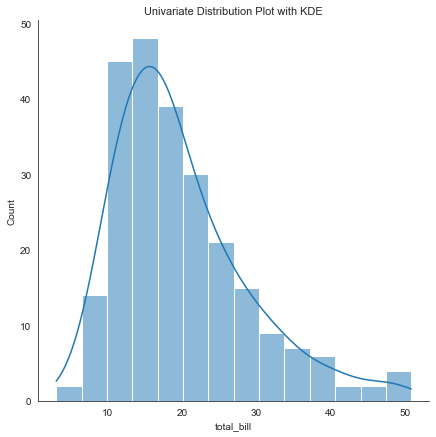

In [10]:
fig, ax = plt.subplots(figsize = (7,7))
sns.histplot(x = 'total_bill', kde = True, data = data, ax=ax)
ax.set_title('Univariate Distribution Plot with KDE', fontsize = 11)
sns.despine()

### Gridded Distribution Plot

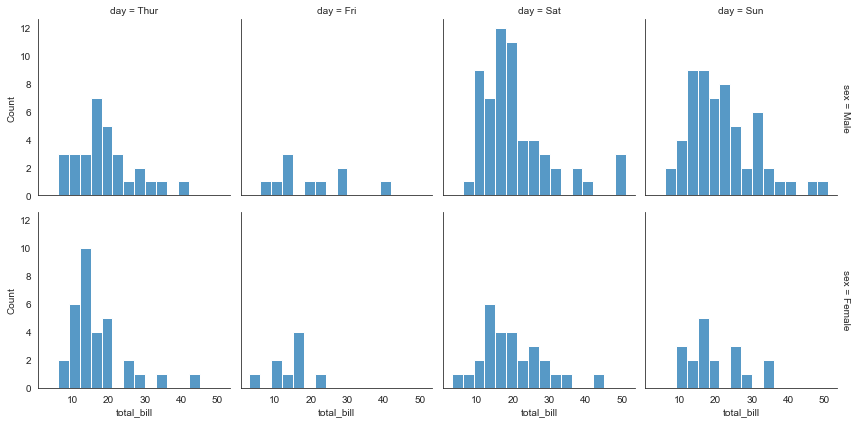

In [11]:
sns.displot(x = 'total_bill', col = 'day', row = 'sex',  data = data, binwidth=3, height=3, facet_kws=dict(margin_titles=True))
sns.despine()

## __6. Joint & Pair Plots__

### Jointplot

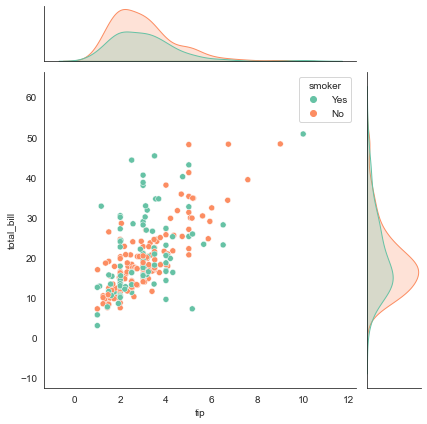

In [12]:
sns.jointplot(x = 'tip', y = 'total_bill', kind = 'scatter', hue = 'smoker', data = data, palette = 'Set2')
sns.despine()

### Pairplot

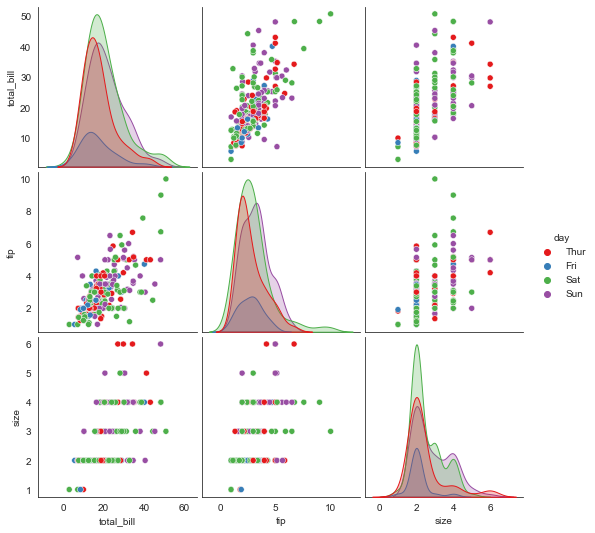

In [13]:
sns.pairplot(data, hue = 'day', kind = 'scatter', diag_kind = 'kde', palette = 'Set1')
sns.despine()

## __7. Heatmap__

Text(0.5, 1.0, 'Correlation Heatmap')

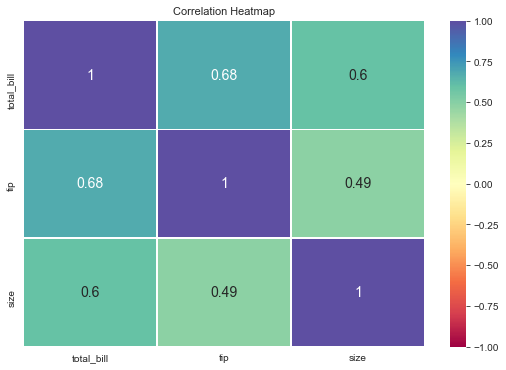

In [14]:
fig, ax = plt.subplots(figsize = (9,6))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap = 'Spectral', linewidths = 0.5, annot = True, annot_kws={"size": 14}, ax=ax)
ax.set_title('Correlation Heatmap', fontsize = 11)

## __8. Linear Regression Plot__

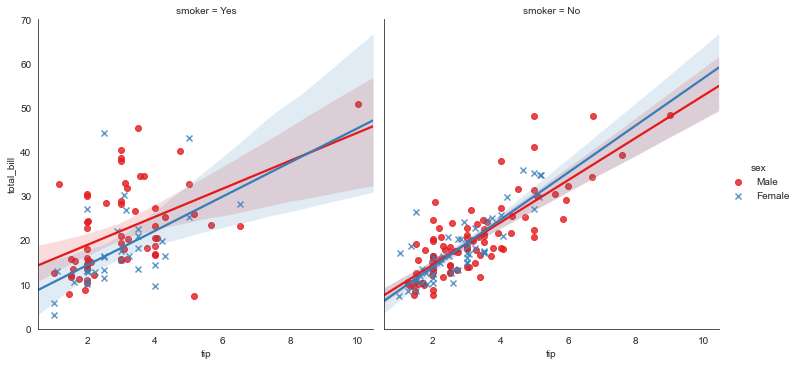

In [15]:
sns.lmplot(x = 'tip', y = 'total_bill',  hue = 'sex', col = 'smoker', markers=["o", "x"], data = data, palette = 'Set1', truncate=False)
sns.despine()